In [1]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
import random
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from rdkit import DataStructs
from rdkit.Chem import PandasTools, AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from pycaret import regression
import seaborn as sns

<AxesSubplot: ylabel='MLM'>

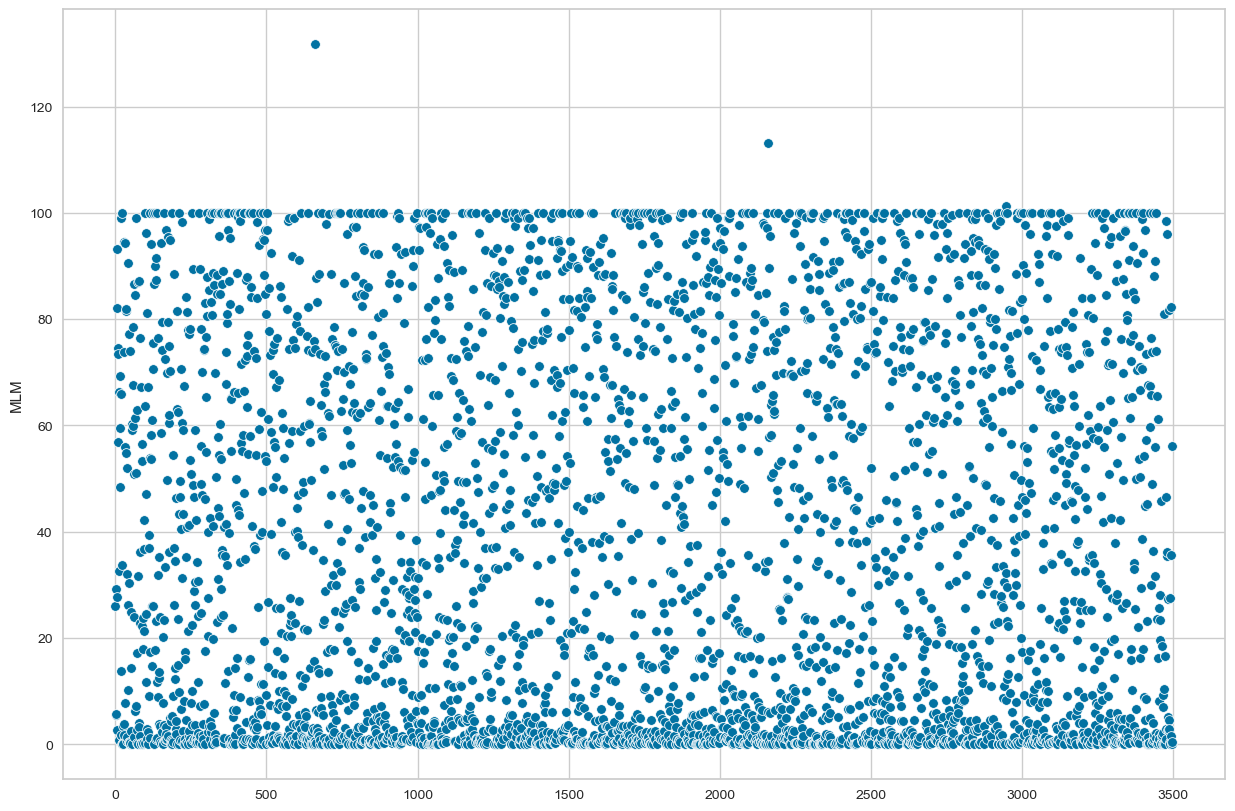

In [7]:
plt.figure(figsize=(15,10))
sns.scatterplot(train['MLM'])

<AxesSubplot: xlabel='HLM', ylabel='Density'>

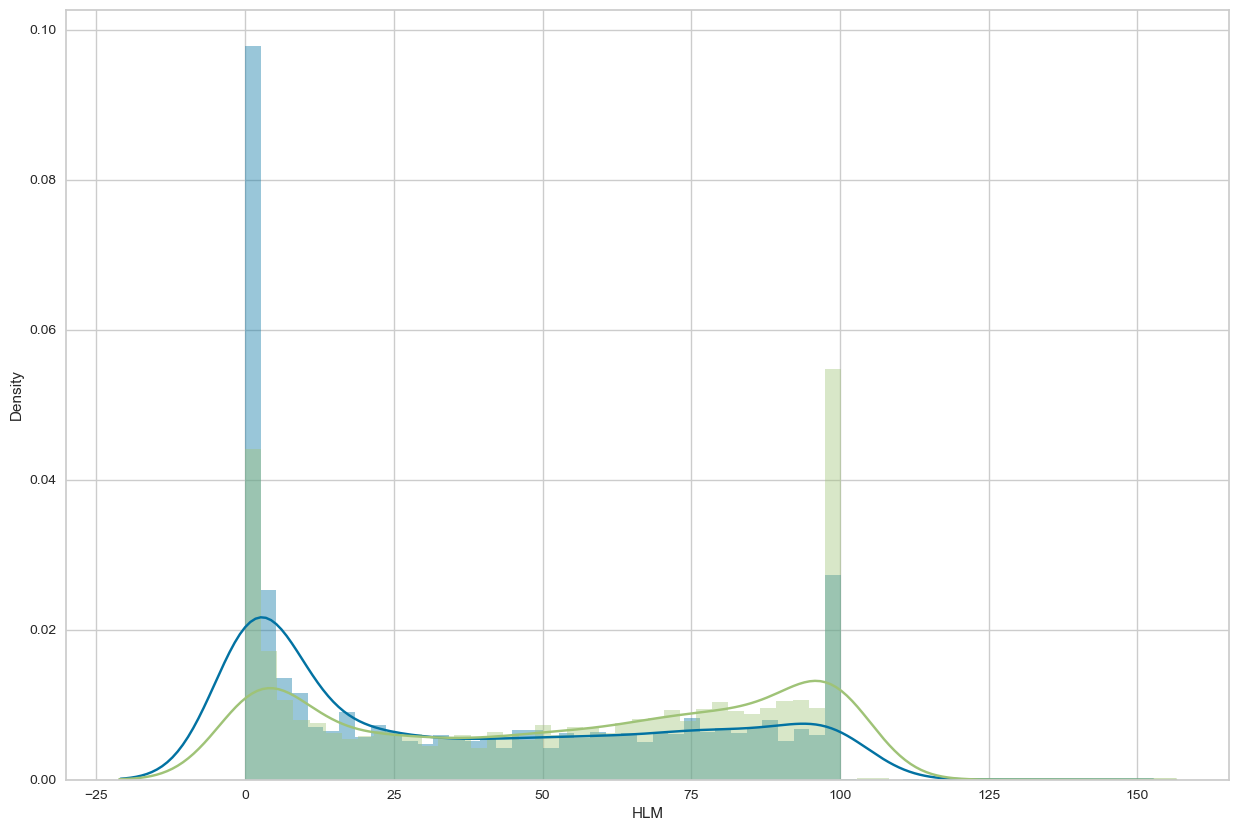

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(train['MLM'],bins=50)
sns.distplot(train['HLM'],bins=50)

In [20]:
train[train['MLM'] >= 99]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
20,TRAIN_0020,CNC(=O)c1cc(Cl)cc(C)c1NC(=O)c1cc(Br)nn1-c1c(F)...,99.00,83.030,5.295,519.675,3,2,4,5.295,76.02
22,TRAIN_0022,O=C(C1CC(=O)N(c2n[nH]c3cc(Br)ccc23)C1)N1CCCC1,99.90,99.900,1.907,377.236,3,1,2,1.907,69.30
68,TRAIN_0068,CS(=O)(=O)c1ccc(Nc2ccc3sc(C(=O)O)cc3c2)c(F)c1,99.00,95.610,3.894,365.399,4,2,4,2.423,120.08
98,TRAIN_0098,CCC(CC)CN(CC(=O)OC)S(=O)(=O)c1ccc(S(C)(=O)=O)cc1,99.91,86.970,2.284,391.503,6,0,10,2.284,114.58
115,TRAIN_0115,CC(C)(C)CNCCn1c(=S)[nH]c2c(Cl)nccc21,99.90,97.176,3.681,298.835,3,2,5,2.471,72.28
...,...,...,...,...,...,...,...,...,...,...,...
3395,TRAIN_3395,Cn1cnnc1C1CCCN1c1ncnc2c1c(Br)nn2C,99.99,99.990,1.727,363.216,5,0,2,1.726,77.55
3402,TRAIN_3402,O=C1C2CC=CCC2C(O)=NN1c1cccc(F)c1,99.90,99.900,2.284,260.264,3,1,1,2.283,52.90
3422,TRAIN_3422,Cc1cc(NNS(=O)(=O)c2cccs2)n2ncnc2n1,99.99,99.990,1.358,310.355,5,2,4,1.358,137.89
3434,TRAIN_3434,CN(C[C@@H]1C[C@H](F)CN1Cc1cncnc1)c1cnc(C#N)cn1,99.99,95.540,0.820,327.359,6,0,5,0.720,81.83


In [19]:
train[train['HLM'] >= 99]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
14,TRAIN_0014,Oc1cc(-c2ccc(-c3ccc(Br)cc3)cc2)nn1-c1ccccn1,69.280,99.000,5.541,392.249,3,1,3,5.539,50.94
22,TRAIN_0022,O=C(C1CC(=O)N(c2n[nH]c3cc(Br)ccc23)C1)N1CCCC1,99.900,99.900,1.907,377.236,3,1,2,1.907,69.30
27,TRAIN_0027,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2,73.730,99.000,2.021,290.268,6,5,1,2.010,110.38
29,TRAIN_0029,CC(C)Cn1c(NCCN(C)C)nc2c1c(=O)[nH]c(=O)n2C,94.600,99.000,1.375,308.379,4,2,6,-0.111,82.50
...,...,...,...,...,...,...,...,...,...,...,...
3422,TRAIN_3422,Cc1cc(NNS(=O)(=O)c2cccs2)n2ncnc2n1,99.990,99.990,1.358,310.355,5,2,4,1.358,137.89
3442,TRAIN_3442,CC(C)n1c(=O)c2cn(S(=O)(=O)c3ccc(C4CCCCC4)cc3)n...,99.990,99.990,4.960,458.574,5,0,5,4.958,100.95
3448,TRAIN_3448,COc1ccc(-c2nc(-c3ccc(C)cc3)no2)c(OC)c1,65.560,99.990,3.598,296.321,4,0,4,3.598,57.38
3471,TRAIN_3471,COc1ccccc1-n1nc2c(C)nnc(C)c2c1C,81.044,99.833,2.469,268.314,4,0,2,2.545,52.83


<AxesSubplot: ylabel='LogD'>

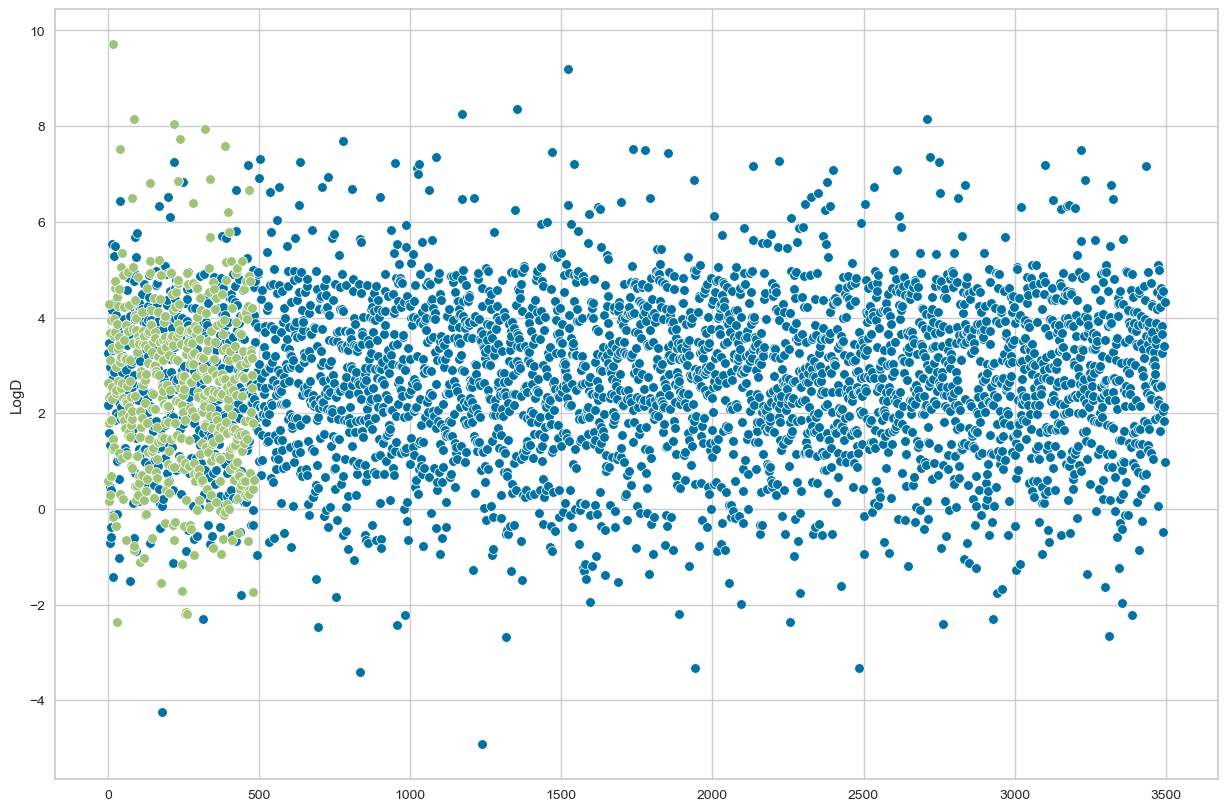

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(train['LogD'])
sns.scatterplot(test['LogD'])

In [27]:
train[train['LogD'] < -4]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
179,TRAIN_0179,CCC(CN1CCN(C)CC1)NC(=O)Cc1csc(Nc2ccccc2F)n1,62.030,50.590,-4.137,597.656,11,6,13,-4.241,220.86
1239,TRAIN_1239,c1ccc(-c2cc(CNCC3COCCO3)c3nnnn3c2)cc1,69.077,48.075,-3.761,517.489,13,5,10,-4.920,205.69


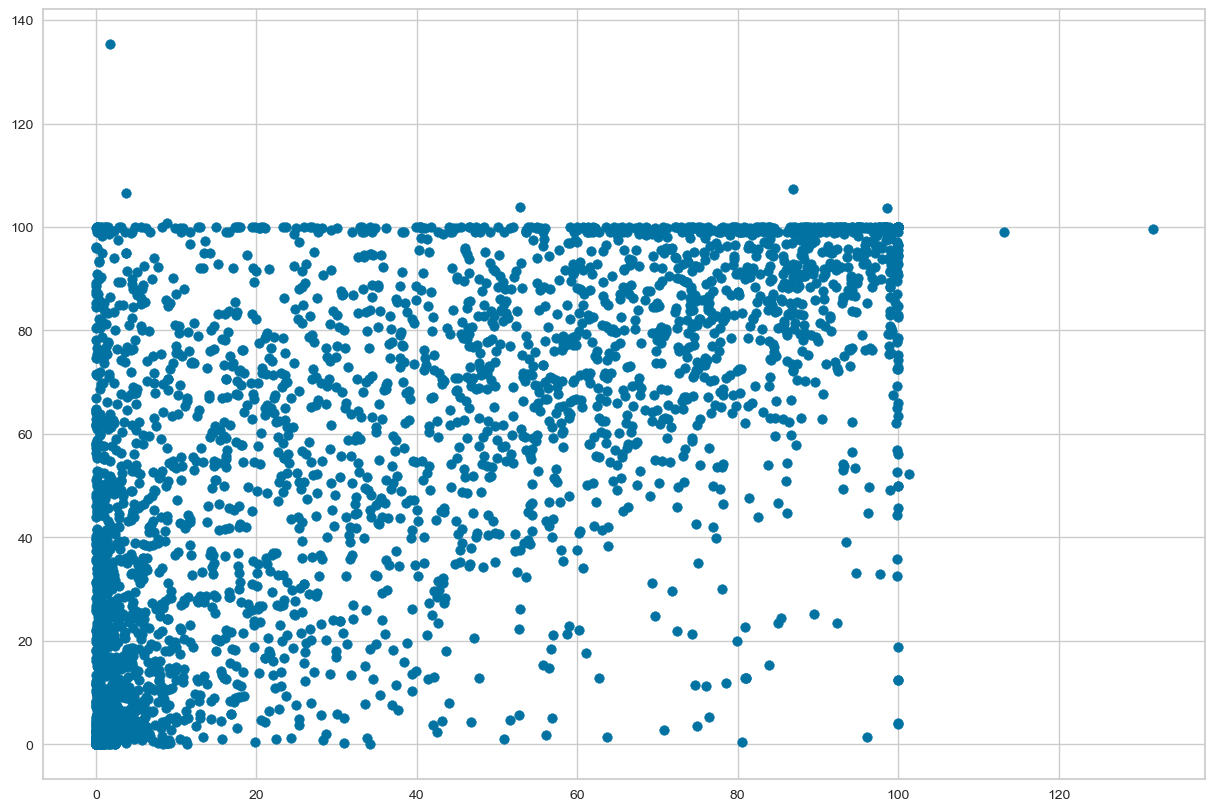

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(train['MLM'],train['HLM'])

In [123]:
train = pd.read_csv('./train.csv')
train = train.groupby('SMILES').mean().reset_index()
train['Molecular_Weight'] = [Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in train['SMILES']]
train['Numbond'] = [Chem.MolFromSmiles(i).GetNumBonds() for i in train['SMILES']]
train['HeavyAtoms'] = [Chem.MolFromSmiles(i).GetNumHeavyAtoms() for i in train['SMILES']]
train['AlogP'] = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in train['SMILES']]


droping = []
tp = pd.DataFrame(train['SMILES'].str.contains('e'))
droping.extend(list(tp[tp['SMILES'] == True].index))
tp = pd.DataFrame(train['SMILES'].str.contains('I'))
droping.extend(list(tp[tp['SMILES'] == True].index))
tp = pd.DataFrame(train['SMILES'].str.contains('6'))
droping.extend(list(tp[tp['SMILES'] == True].index))
train = train.drop(droping)

# PandasTools.AddMoleculeColumnToFrame(train,'SMILES','Molecule')
# PandasTools.AddMoleculeColumnToFrame(test,'SMILES','Molecule')
# def mol2fp(mol):
#     fp = AllChem.GetHashedMorganFingerprint(mol, 6, nBits=64)
#     ar = np.zeros((1,), dtype=np.int8)
#     DataStructs.ConvertToNumpyArray(fp, ar)
#     return ar

# train["FPs"] = train.Molecule.apply(mol2fp)
# test["FPs"] = test.Molecule.apply(mol2fp)


mlm_train = train.drop(['SMILES','HLM'],axis=1)
hlm_train = train.drop(['SMILES','MLM'],axis=1)
train = train.reset_index(drop=True)

In [127]:
mlm_train = pd.concat([mlm_train,pd.DataFrame([list(i) for i in train.FPs])],axis=1)
mlm_train = mlm_train.dropna()
mlm_train = mlm_train.reset_index(drop=True)
mlm_train = mlm_train.drop(['FPs','Molecule'],axis=1)

In [120]:
# mlm_train = mlm_train.loc[:,['MLM','Molecular_Weight','AlogP','LogD','Molecular_PolarSurfaceArea']]

In [94]:
hlm_train = pd.concat([hlm_train,pd.DataFrame([list(i) for i in train.FPs])],axis=1)
hlm_train = hlm_train.dropna()
hlm_train = hlm_train.reset_index(drop=True)
hlm_train = hlm_train.drop(['FPs','Molecule'],axis=1)

In [116]:
test['Molecular_Weight'] = [Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in test['SMILES']]
test['Numbond'] = [Chem.MolFromSmiles(i).GetNumBonds() for i in test['SMILES']]
test['HeavyAtoms'] = [Chem.MolFromSmiles(i).GetNumHeavyAtoms() for i in test['SMILES']]

smiles = test['SMILES'][10]
mol = Chem.MolFromSmiles(smiles)
alogp = Descriptors.MolLogP(mol)
test['AlogP'][10] = alogp
test['AlogP'] = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in test['SMILES']]

# test = pd.concat([test,pd.DataFrame([list(i) for i in test.FPs])],axis=1)
# test = test.drop(['id','SMILES','Molecule','FPs'],axis=1)
# test = test.astype('float64')
# test.columns = [str(i) for i in test.columns]

In [6]:
mlm_train = pd.read_csv('./mlm_train.csv').drop('Unnamed: 0',axis=1)
mlm_train = mlm_train.drop(['id','SMILES','HLM'],axis=1)

In [8]:
regression.setup(data=mlm_train,target='MLM',
                 fold_strategy='kfold',
                 fold=5,
                 session_id=42)

best = regression.compare_models(sort='RMSE',n_select=5)

,Description,Value
0,Session id,42
1,Target,MLM
2,Target type,Regression
3,Original data shape,"(2731, 234)"
4,Transformed data shape,"(2731, 234)"
5,Transformed train set shape,"(1911, 234)"
6,Transformed test set shape,"(820, 234)"
7,Numeric features,233
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,17.0720,467.9267,21.5978,0.5582,1.3200,33.4029,5.6940
et,Extra Trees Regressor,17.7347,493.6049,22.1947,0.5338,1.3467,36.2906,4.6640
lightgbm,Light Gradient Boosting Machine,17.4547,500.9752,22.3554,0.5268,1.3215,33.7205,3.8980
gbr,Gradient Boosting Regressor,17.9314,505.1463,22.4548,0.5228,1.3816,40.3878,4.0300
rf,Random Forest Regressor,18.0491,514.8429,22.6649,0.5131,1.3585,38.2332,4.8980
xgboost,Extreme Gradient Boosting,17.6826,525.7698,22.8750,0.5031,1.3344,35.9882,3.9360
br,Bayesian Ridge,20.4727,621.5683,24.9188,0.4128,1.4787,45.5012,3.6980
omp,Orthogonal Matching Pursuit,20.8630,655.3908,25.5918,0.3805,1.4888,47.5270,3.7080
ridge,Ridge Regression,20.8646,672.2597,25.9037,0.3656,1.4771,47.8832,3.7660
lasso,Lasso Regression,21.4389,672.9589,25.9327,0.3640,1.5265,52.6658,3.6680


In [9]:
# best_tune = [regression.tune_model(i,fold=10) for i in best]

In [12]:
test = pd.read_csv('./data_t.csv').drop(['Unnamed: 0'],axis=1)
mlm = [i.predict(test) for i in best]

In [104]:
# test = pd.read_csv('./test.csv')
# test['Molecular_Weight'] = [Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in test['SMILES']]
# test['Numbond'] = [Chem.MolFromSmiles(i).GetNumBonds() for i in test['SMILES']]
# test['HeavyAtoms'] = [Chem.MolFromSmiles(i).GetNumHeavyAtoms() for i in test['SMILES']]

# smiles = test['SMILES'][10]
# mol = Chem.MolFromSmiles(smiles)
# alogp = Descriptors.MolLogP(mol)
# test['AlogP'][10] = alogp
# test['AlogP'] = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in test['SMILES']]

# test = test.drop(['id','SMILES'],axis=1)

# mlm = [i.predict(test) for i in best_tune]
# pred_mlm = np.array(mlm).mean(axis=0)

In [16]:
hlm_train = pd.read_csv('./hlm_train.csv').drop('Unnamed: 0',axis=1)
hlm_train = hlm_train.drop(['id','SMILES','MLM'],axis=1)

In [17]:
# train = pd.read_csv('./train.csv')
# train = train.groupby('SMILES').mean().reset_index()
# train['Molecular_Weight'] = [Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in train['SMILES']]
# train['Numbond'] = [Chem.MolFromSmiles(i).GetNumBonds() for i in train['SMILES']]
# train['HeavyAtoms'] = [Chem.MolFromSmiles(i).GetNumHeavyAtoms() for i in train['SMILES']]
# train['AlogP'] = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in train['SMILES']]


# droping = []
# tp = pd.DataFrame(train['SMILES'].str.contains('e'))
# droping.extend(list(tp[tp['SMILES'] == True].index))
# tp = pd.DataFrame(train['SMILES'].str.contains('I'))
# droping.extend(list(tp[tp['SMILES'] == True].index))
# tp = pd.DataFrame(train['SMILES'].str.contains('6'))
# droping.extend(list(tp[tp['SMILES'] == True].index))
# droping
# train = train.drop(droping)


# hlm_train = train.drop(['SMILES','MLM'],axis=1)

regression.setup(data=hlm_train,target='HLM',
                 fold_strategy='kfold',
                 fold=5,
                 session_id=42)

best = regression.compare_models(sort='RMSE',n_select=5)

,Description,Value
0,Session id,42
1,Target,HLM
2,Target type,Regression
3,Original data shape,"(2627, 234)"
4,Transformed data shape,"(2627, 234)"
5,Transformed train set shape,"(1838, 234)"
6,Transformed test set shape,"(789, 234)"
7,Numeric features,233
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,19.1334,545.9922,23.3454,0.5241,1.0172,10.1321,5.4340
gbr,Gradient Boosting Regressor,19.6907,571.2614,23.8920,0.5023,1.0609,11.8590,4.0360
lightgbm,Light Gradient Boosting Machine,19.3243,573.2694,23.9232,0.5003,1.0184,13.1863,3.7780
et,Extra Trees Regressor,20.0311,585.2669,24.1799,0.4899,1.0557,12.1216,4.5500
rf,Random Forest Regressor,20.0221,593.1420,24.3387,0.4829,1.0587,12.7246,4.6460
xgboost,Extreme Gradient Boosting,20.0891,620.1301,24.8811,0.4588,1.0318,11.8840,4.0720
ada,AdaBoost Regressor,22.5236,688.5688,26.2357,0.4010,1.1804,17.7237,3.6480
br,Bayesian Ridge,22.0623,698.8243,26.4168,0.3921,1.1324,12.9605,3.7220
omp,Orthogonal Matching Pursuit,22.5967,741.3471,27.2052,0.3553,1.1379,12.6998,3.6700
lasso,Lasso Regression,22.7756,744.9527,27.2796,0.3521,1.1681,15.3613,3.7200


In [18]:
# best_tune = [regression.tune_model(i,fold=10) for i in best]

In [20]:
hlm = [i.predict(test) for i in best]

In [13]:
# test = pd.read_csv('./test.csv')
# test['Molecular_Weight'] = [Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in test['SMILES']]
# test['Numbond'] = [Chem.MolFromSmiles(i).GetNumBonds() for i in test['SMILES']]
# test['HeavyAtoms'] = [Chem.MolFromSmiles(i).GetNumHeavyAtoms() for i in test['SMILES']]

# smiles = test['SMILES'][10]
# mol = Chem.MolFromSmiles(smiles)
# alogp = Descriptors.MolLogP(mol)
# test['AlogP'][10] = alogp

# test['AlogP'] = [Descriptors.MolLogP(Chem.MolFromSmiles(i)) for i in test['SMILES']]

# test = test.drop(['id','SMILES'],axis=1)

# hlm = [i.predict(test) for i in best]
# pred_hlm = np.array(hlm).mean(axis=0)

In [51]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(n_estimators=1000,random_seed=42,max_depth=12,loss_function='RMSE')
cat.fit(hlm_train.drop('HLM',axis=1),hlm_train['HLM'],verbose=500)
pred_hlm_cat = cat.predict(test)

from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=1000,random_seed=42,learning_rate=0.001,verbose=500,max_depth=12,loss_function='RMSE')
lgb.fit(hlm_train.drop('HLM',axis=1),hlm_train['HLM'])
pred_hlm_lgb = lgb.predict(test)

from xgboost import XGBRegressor
xgb = XGBRegressor(random_seed=42,n_estimators=1000,loss_function='RMSE',verbose=1000,max_depth=12)
xgb.fit(hlm_train.drop('HLM',axis=1),hlm_train['HLM'])
pred_hlm_xgb = xgb.predict(test)

Learning rate set to 0.047693
0:	learn: 33.2486062	total: 74.9ms	remaining: 1m 14s
500:	learn: 5.6845167	total: 40.4s	remaining: 40.2s
999:	learn: 1.6670106	total: 1m 20s	remaining: 0us
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.915986
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.831793
[LightGBM] [Debug] init for col-wise cost 0.001397 seconds, init for row-wise cost 0.002031 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug]

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [De

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug

In [52]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(n_estimators=500,random_seed=42,max_depth=12,loss_function='RMSE')
cat.fit(mlm_train.drop('MLM',axis=1),mlm_train['MLM'],verbose=500)
pred_mlm_cat = cat.predict(test)

from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=500,random_seed=42,learning_rate=0.001,verbose=500,max_depth=12,loss_function='RMSE')
lgb.fit(mlm_train.drop('MLM',axis=1),mlm_train['MLM'])
pred_mlm_lgb = lgb.predict(test)

from xgboost import XGBRegressor
xgb = XGBRegressor(random_seed=42,n_estimators=500,loss_function='RMSE',verbose=1000,max_depth=12)
xgb.fit(mlm_train.drop('MLM',axis=1),mlm_train['MLM'])
pred_mlm_xgb = xgb.predict(test)

Learning rate set to 0.047986
0:	learn: 31.7702937	total: 86.9ms	remaining: 1m 26s
500:	learn: 6.5321403	total: 41.9s	remaining: 41.7s
999:	learn: 2.0012318	total: 1m 24s	remaining: 0us
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.915657
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.831675
[LightGBM] [Debug] init for col-wise cost 0.001850 seconds, init for row-wise cost 0.001850 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Traine

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] 

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debu

[05:13:46] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "loss_function", "random_seed", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
# pred_mlm = np.array(mlm).mean(axis=0)
# pred_hlm = np.array(hlm).mean(axis=0)

In [53]:
sub = pd.read_csv('./sample_submission.csv')
sub['MLM'] = 0.5*pred_mlm_cat + 0.3*pred_mlm_lgb + 0.2*pred_mlm_xgb
sub['HLM'] = 0.5*pred_hlm_cat + 0.3*pred_hlm_lgb + 0.2*pred_hlm_xgb
sub = sub.set_index('id')
sub.to_csv('./submission.csv')